In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../Курсач"))

['.ipynb_checkpoints', 'BlackFriday.csv', 'FirstStep.ipynb']


In [4]:
##reading the data 
df = pd.read_csv('BlackFriday.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
## to check which columns have null values.
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [8]:
print('Product_Category_2', df['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
-----------------------------------------------------------------------------------
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [9]:
## So all values are in integer range. May be we can assign value zero for the NaN cases
df.fillna(value=0,inplace=True)
## Also looks like the product categories are float while they can be int.
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)
print('Product_Category_2', df['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', df['Product_Category_3'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
-----------------------------------------------------------------------------------
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


In [11]:
## We might not need product Id and user Id hence dropping them
df.drop(columns = ["User_ID","Product_ID"],inplace=True)
## need to always remember to use inplace to make the changes in current data frame

KeyError: "labels ['User_ID' 'Product_ID'] not contained in axis"

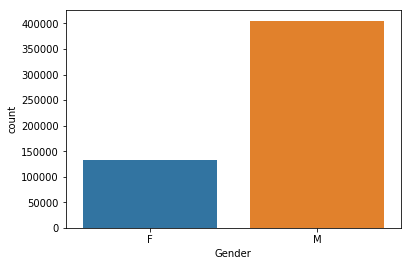

In [12]:
sns.countplot(df['Gender'])